# Basic Queries

## Connecting to Gaia

In [1]:
from astroquery.gaia import Gaia

In [2]:
tables = Gaia.load_tables(only_names=True)

INFO: Retrieving tables... [astroquery.utils.tap.core]
INFO: Parsing tables... [astroquery.utils.tap.core]
INFO: Done. [astroquery.utils.tap.core]


## Databases and Tables

In [3]:
for table in tables:
    print(table.name)

external.apassdr9
external.catwise2020
external.gaiadr2_astrophysical_parameters
external.gaiadr2_geometric_distance
external.gaiaedr3_distance
external.gaiaedr3_gcns_main_1
external.gaiaedr3_gcns_rejected_1
external.gaiaedr3_spurious
external.gaia_eso_survey
external.galex_ais
external.lamost_dr9_lrs
external.lamost_dr9_mrs
external.ravedr5_com
external.ravedr5_dr5
external.ravedr5_gra
external.ravedr5_on
external.ravedr6
external.sdssdr13_photoprimary
external.skymapperdr1_master
external.skymapperdr2_master
external.tmass_xsc
external.xgboost_table1
external.xgboost_table2
gaiadr1.aux_qso_icrf2_match
gaiadr1.ext_phot_zero_point
gaiadr1.allwise_best_neighbour
gaiadr1.allwise_neighbourhood
gaiadr1.gsc23_best_neighbour
gaiadr1.gsc23_neighbourhood
gaiadr1.ppmxl_best_neighbour
gaiadr1.ppmxl_neighbourhood
gaiadr1.sdss_dr9_best_neighbour
gaiadr1.sdss_dr9_neighbourhood
gaiadr1.tmass_best_neighbour
gaiadr1.tmass_neighbourhood
gaiadr1.ucac4_best_neighbour
gaiadr1.ucac4_neighbourhood
gaiadr1.u

In [4]:
table_metadata = Gaia.load_table('gaiadr2.gaia_source')

In [5]:
table_metadata

In [6]:
print(table_metadata)

TAP Table name: gaiadr2.gaiadr2.gaia_source
Description: This table has an entry for every Gaia observed source as listed in the
Main Database accumulating catalogue version from which the catalogue
release has been generated. It contains the basic source parameters,
that is only final data (no epoch data) and no spectra (neither final
nor epoch).
Num. columns: 96


## Columns

In [7]:
for column in table_metadata.columns:
    print(column.name)

solution_id
designation
source_id
random_index
ref_epoch
ra
ra_error
dec
dec_error
parallax
parallax_error
parallax_over_error
pmra
pmra_error
pmdec
pmdec_error
ra_dec_corr
ra_parallax_corr
ra_pmra_corr
ra_pmdec_corr
dec_parallax_corr
dec_pmra_corr
dec_pmdec_corr
parallax_pmra_corr
parallax_pmdec_corr
pmra_pmdec_corr
astrometric_n_obs_al
astrometric_n_obs_ac
astrometric_n_good_obs_al
astrometric_n_bad_obs_al
astrometric_gof_al
astrometric_chi2_al
astrometric_excess_noise
astrometric_excess_noise_sig
astrometric_params_solved
astrometric_primary_flag
astrometric_weight_al
astrometric_pseudo_colour
astrometric_pseudo_colour_error
mean_varpi_factor_al
astrometric_matched_observations
visibility_periods_used
astrometric_sigma5d_max
frame_rotator_object_type
matched_observations
duplicated_source
phot_g_n_obs
phot_g_mean_flux
phot_g_mean_flux_error
phot_g_mean_flux_over_error
phot_g_mean_mag
phot_bp_n_obs
phot_bp_mean_flux
phot_bp_mean_flux_error
phot_bp_mean_flux_over_error
phot_bp_mean_ma

## Exercise

In [8]:
table_metadata = Gaia.load_table('gaiadr2.panstarrs1_original_valid')
print(table_metadata)

TAP Table name: gaiadr2.gaiadr2.panstarrs1_original_valid
Description: The Panoramic Survey Telescope and Rapid Response System (Pan-STARRS) is
a system for wide-field astronomical imaging developed and operated by
the Institute for Astronomy at the University of Hawaii. Pan-STARRS1
(PS1) is the first part of Pan-STARRS to be completed and is the basis
for Data Release 1 (DR1). The PS1 survey used a 1.8 meter telescope and
its 1.4 Gigapixel camera to image the sky in five broadband filters (g,
r, i, z, y).

The current table contains a filtered subsample of the 10 723 304 629
entries listed in the original ObjectThin table.
We used only ObjectThin and MeanObject tables to extract
panstarrs1OriginalValid table, this means that objects detected only in
stack images are not included here. The main reason for us to avoid the
use of objects detected in stack images is that their astrometry is not
as good as the mean objects astrometry: “The stack positions (raStack,
decStack) have considera

#### There are 26 columns

## Writing queries

In [9]:
query1 = """SELECT
TOP 10
source_id, ra, dec, parallax
FROM gaiadr2.gaia_source"""

In [10]:
job1 = Gaia.launch_job(query1)

In [11]:
print(job1)

<Table length=10>
   name    dtype  unit                            description                             n_bad
--------- ------- ---- ------------------------------------------------------------------ -----
SOURCE_ID   int64      Unique source identifier (unique within a particular Data Release)     0
       ra float64  deg                                                    Right ascension     0
      dec float64  deg                                                        Declination     0
 parallax float64  mas                                                           Parallax     1
Jobid: None
Phase: COMPLETED
Owner: None
Output file: 1736447974373O-result.vot.gz
Results: None


In [12]:
results1 = job1.get_results()
type(results1)

astropy.table.table.Table

In [13]:
results1

SOURCE_ID,ra,dec,parallax
,deg,deg,mas
int64,float64,float64,float64
4650806917050737024,86.66276426282336,-71.88907135375828,2.547129799995789
4650805061623258368,87.15910039899656,-71.8512401253341,--
4650803068758139776,87.12862287942131,-71.93384708597235,0.3034526409380112
4650804000749795072,86.92690736466464,-71.88991749461822,1.8775481054481071
4650810868419397504,86.43507340751907,-71.6792196883752,0.281243645069422
4650809326503866880,86.65616768408975,-71.76874242097418,-0.6281547713552408
4650821622989822080,85.88985114765768,-72.81656297311334,0.034697824259037245
4650817156230129024,85.30383495947518,-72.92150968107906,-0.1669041535231908


## Exercise

In [14]:
query1_with_rv = """SELECT
TOP 10
source_id, ra, dec, parallax, radial_velocity
FROM gaiadr2.gaia_source"""

In [15]:
job1_with_rv = Gaia.launch_job(query1_with_rv)

In [16]:
results1_with_rv = job1_with_rv.get_results()
print(results1_with_rv)

     SOURCE_ID              ra        ...       parallax       radial_velocity
                           deg        ...         mas               km / s    
------------------- ----------------- ... -------------------- ---------------
4650806917050737024 86.66276426282336 ...    2.547129799995789              --
4650805061623258368 87.15910039899656 ...                   --              --
4650803068758139776 87.12862287942131 ...   0.3034526409380112              --
4650804000749795072 86.92690736466464 ...   1.8775481054481071              --
4650810868419397504 86.43507340751907 ...    0.281243645069422              --
4650809326503866880 86.65616768408975 ...  -0.6281547713552408              --
4650821622989822080 85.88985114765768 ... 0.034697824259037245              --
4650817156230129024 85.30383495947518 ...  -0.1669041535231908              --
4650810456102640512 86.42818617680082 ...   2.2415275063597577              --
4650803790291197440 86.89833056035295 ... -0.0926097

#### radial velocity has units of km/s

## Asynchronous queries

In [17]:
query2 = """SELECT
TOP 3000 
source_id, ra, dec, pmra, pmdec, parallax
FROM gaiadr2.gaia_source
WHERE parallax < 1
"""

In [18]:
job2 = Gaia.launch_job_async(query2)
job2

INFO: Query finished. [astroquery.utils.tap.core]


In [19]:
results2 = job2.get_results()
results2

SOURCE_ID,ra,dec,pmra,pmdec,parallax
,deg,deg,mas / yr,mas / yr,mas
int64,float64,float64,float64,float64,float64
4650803068758139776,87.12862287942131,-71.93384708597235,1.9300679332201691,10.862700076280591,0.3034526409380112
4650810868419397504,86.43507340751907,-71.6792196883752,3.042834345528439,1.9312869226471463,0.281243645069422
4650809326503866880,86.65616768408975,-71.76874242097418,2.376899771546038,2.6657481352772256,-0.6281547713552408
4650821622989822080,85.88985114765768,-72.81656297311334,2.463514904318286,0.5800431828399676,0.034697824259037245
4650817156230129024,85.30383495947518,-72.92150968107906,2.6170787385966454,0.9839970105345758,-0.1669041535231908
4650803790291197440,86.89833056035295,-71.89827964260198,1.51506640599072,0.6741620009014335,-0.09260973101109729
4650810456102536960,86.43438478814306,-71.70465322985876,11.717726902491425,3.2904827487210224,-1.1498403769559637
4650804992903670656,87.23904178745705,-71.86800241973454,2.2181740777648975,3.043760504398719,-1.3887811423900753


## Exercise

In [20]:
query2_err = """SELECT
TOP 3000 
WHERE parallax < 1
source_id, ra, dec, pmra, pmdec, parallax
FROM gaiadr2.gaia_source
"""

In [21]:
job2_err = Gaia.launch_job_async(query2_err)

500 Error 500:
null


HTTPError: Error 500:
null

## Operators

## Exercise

In [33]:
query2_sol = """SELECT
TOP 3000 
source_id, ra, dec, pmra, pmdec, parallax
FROM gaiadr2.gaia_source
WHERE parallax < 1
AND bp_rp BETWEEN -0.75 AND 2
"""

In [34]:
job2_sol = Gaia.launch_job_async(query2_sol)

INFO: Query finished. [astroquery.utils.tap.core]


In [35]:
results2_sol = job2_sol.get_results()

In [36]:
results2_sol

SOURCE_ID,ra,dec,pmra,pmdec,parallax
,deg,deg,mas / yr,mas / yr,mas
int64,float64,float64,float64,float64,float64
6725820108704108160,273.660839666559,-39.899661347433025,-5.862320992062847,-8.293755232893394,0.6221818809598308
6725832375117014912,273.3074406925298,-39.823173762548606,1.3386455026117825,-6.6618563692222,0.564464367779084
6725819245397180544,273.7315450606366,-39.90409326288873,-0.9344926745850832,-1.7693868008547702,0.46634692333465627
6725811072077877376,273.5216616229823,-40.10045028651874,-0.5732321345260953,-4.34210149404516,0.07506201031161278
6725822543915030144,273.7825865151212,-39.748839061968845,-0.4049296945296631,-0.25428410702223164,0.24346311746361168
6725834093105854336,273.3413532939256,-39.76024976017701,-1.4818609615998848,-2.367008827605021,0.360276901199704
6725832340757272832,273.2944724218089,-39.836396441913635,-1.9946005591344385,-8.558903536500699,-0.26116786356474375
6725815676285156864,273.4528354164483,-39.97895537824704,1.4384621436514966,-1.4453434095380187,-1.0802074856784734


## Formatting queries

In [28]:
columns = 'source_id, ra, dec, pmra, pmdec, parallax'

In [29]:
columns = 'source_id, ra, dec, pmra, pmdec, parallax'

In [30]:
query3_base = """SELECT
TOP 10
{columns}
FROM gaiadr2.gaia_source
WHERE parallax < 1
   AND bp_rp BETWEEN -0.75 AND 2
"""

In [31]:
query3 = query3_base.format(columns=columns)

In [32]:
query3

'SELECT\nTOP 10\nsource_id, ra, dec, pmra, pmdec, parallax\nFROM gaiadr2.gaia_source\nWHERE parallax < 1\n   AND bp_rp BETWEEN -0.75 AND 2\n'

In [40]:
print(query3)

SELECT
TOP 10
source_id, ra, dec, pmra, pmdec, parallax
FROM gaiadr2.gaia_source
WHERE parallax < 1
   AND bp_rp BETWEEN -0.75 AND 2



In [41]:
job3 = Gaia.launch_job(query3)
print(job3)

<Table length=10>
   name    dtype    unit                              description                            
--------- ------- -------- ------------------------------------------------------------------
SOURCE_ID   int64          Unique source identifier (unique within a particular Data Release)
       ra float64      deg                                                    Right ascension
      dec float64      deg                                                        Declination
     pmra float64 mas / yr                         Proper motion in right ascension direction
    pmdec float64 mas / yr                             Proper motion in declination direction
 parallax float64      mas                                                           Parallax
Jobid: None
Phase: COMPLETED
Owner: None
Output file: 1736447513277O-result.vot.gz
Results: None


In [42]:
results3 = job3.get_results()

In [43]:
results3

SOURCE_ID,ra,dec,pmra,pmdec,parallax
,deg,deg,mas / yr,mas / yr,mas
int64,float64,float64,float64,float64,float64
4650803068758139776,87.12862287942131,-71.93384708597235,1.9300679332201691,10.862700076280591,0.3034526409380112
4650810868419397504,86.43507340751907,-71.6792196883752,3.042834345528439,1.9312869226471463,0.281243645069422
4650821622989822080,85.88985114765768,-72.81656297311334,2.463514904318286,0.5800431828399676,0.034697824259037245
4650817156230129024,85.30383495947518,-72.92150968107906,2.6170787385966454,0.9839970105345758,-0.1669041535231908
4650803790291197440,86.89833056035295,-71.89827964260198,1.51506640599072,0.6741620009014335,-0.09260973101109729
4650804992903670656,87.23904178745705,-71.86800241973454,2.2181740777648975,3.043760504398719,-1.3887811423900753
4650804477507441792,87.25443706472764,-71.90191041459914,1.5324379064896758,0.7372750478131816,0.5222554969054936
5836226553757320704,240.59674538609184,-56.37233021982805,-6.773654241702397,-2.6921217230628076,0.3543262945562033


In [44]:
query3_base_sol = """SELECT
TOP 10
{columns}
FROM gaiadr2.gaia_source
WHERE parallax < {max_parallax}
   AND bp_rp BETWEEN -0.75 AND 2
"""

In [45]:
query3_sol = query3_base_sol.format(columns=columns, max_parallax=1.5)

In [46]:
print(query3_sol)

SELECT
TOP 10
source_id, ra, dec, pmra, pmdec, parallax
FROM gaiadr2.gaia_source
WHERE parallax < 1.5
   AND bp_rp BETWEEN -0.75 AND 2



In [47]:
job3_sol = Gaia.launch_job(query3_sol)
results3_sol = job3_sol.get_results()

In [48]:
results3_sol

SOURCE_ID,ra,dec,pmra,pmdec,parallax
,deg,deg,mas / yr,mas / yr,mas
int64,float64,float64,float64,float64,float64
4650803068758139776,87.12862287942131,-71.93384708597235,1.9300679332201691,10.862700076280591,0.3034526409380112
4650810868419397504,86.43507340751907,-71.6792196883752,3.042834345528439,1.9312869226471463,0.281243645069422
4650821622989822080,85.88985114765768,-72.81656297311334,2.463514904318286,0.5800431828399676,0.034697824259037245
4650817156230129024,85.30383495947518,-72.92150968107906,2.6170787385966454,0.9839970105345758,-0.1669041535231908
4650803790291197440,86.89833056035295,-71.89827964260198,1.51506640599072,0.6741620009014335,-0.09260973101109729
4650804992903670656,87.23904178745705,-71.86800241973454,2.2181740777648975,3.043760504398719,-1.3887811423900753
4650804477507441792,87.25443706472764,-71.90191041459914,1.5324379064896758,0.7372750478131816,0.5222554969054936
5836219166405161600,241.21225476755652,-56.27555385961692,-4.833263393280624,-3.3544779914375438,1.0668593910114954


# Coordinate Transformations

## Working with Units

quantity: value + unit

In [43]:
import astropy.units as u

In [44]:
#view all units 
dir(u)

['A',
 'AA',
 'AB',
 'ABflux',
 'ABmag',
 'AU',
 'Angstrom',
 'B',
 'Ba',
 'Barye',
 'Bethe',
 'Bi',
 'Biot',
 'Bol',
 'Bq',
 'C',
 'Celsius',
 'Ci',
 'CompositeUnit',
 'D',
 'DN',
 'Da',
 'Dalton',
 'Debye',
 'Decibel',
 'DecibelUnit',
 'Dex',
 'DexUnit',
 'EA',
 'EAU',
 'EB',
 'EBa',
 'EBq',
 'EC',
 'ECi',
 'ED',
 'EF',
 'EG',
 'EGal',
 'EGy',
 'EH',
 'EHz',
 'EJ',
 'EJy',
 'EK',
 'EL',
 'EN',
 'EOe',
 'EOhm',
 'EP',
 'EPa',
 'ER',
 'ERy',
 'ES',
 'ESt',
 'ESv',
 'ET',
 'EV',
 'EW',
 'EWb',
 'Ea',
 'Eadu',
 'Earcmin',
 'Earcsec',
 'Eau',
 'Eb',
 'Ebarn',
 'Ebeam',
 'Ebin',
 'Ebit',
 'Ebyte',
 'Ecd',
 'Echan',
 'Ecount',
 'Ect',
 'Ed',
 'Edeg',
 'Edyn',
 'EeV',
 'Eerg',
 'Eg',
 'Eh',
 'EiB',
 'Eib',
 'Eibit',
 'Eibyte',
 'Ek',
 'Ekat',
 'El',
 'Elm',
 'Elx',
 'Elyr',
 'Em',
 'Emag',
 'Emin',
 'Emol',
 'Eohm',
 'Epc',
 'Eph',
 'Ephoton',
 'Epix',
 'Epixel',
 'Equivalency',
 'Erad',
 'Es',
 'Esr',
 'Eu',
 'Evox',
 'Evoxel',
 'Eyr',
 'F',
 'Farad',
 'Fr',
 'Franklin',
 'FunctionQuantity'

In [46]:
angle = 10 * u.degree
type(angle)

astropy.units.quantity.Quantity

In [47]:
angle

<Quantity 10. deg>

#### Converting between units

In [48]:
angle_arcmin = angle.to(u.arcmin)
angle_arcmin

<Quantity 600. arcmin>

#### not compatible units error

In [49]:
angle + 5 *u.kg

UnitConversionError: Can only apply 'add' function to quantities with compatible dimensions

## Exercise
Create a quantity that represents 5 arcminues and assign it to a variable called radius. Then convert it to degrees

#### Solution

In [50]:
radius = 5 * u.arcmin
radius.to(u.degree)

<Quantity 0.08333333 deg>

## Selecting a Region

common query is to select a region of the sky

In [53]:
cone_query = """SELECT
TOP 10
source_id
FROM gaiadr2.gaia_source
WHERE 1=CONTAINS(
   POINT(ra, dec),
   CIRCLE(88.8, 7.4, 0.083))
"""

* POINT: all ra and dec in specified region
* CIRCLE: a cone centered on ra=88.8 deg, dec=7.4 deg, with a radius of 0.083 degrees
* CONTAINS: all points in circle have CONTAINS=1, outside CONTAINS=0. This returns WHERE CONTAINS=1

In [54]:
cone_job = Gaia.launch_job(cone_query)
cone_job

In [57]:
cone_results = cone_job.get_results()
cone_results

SOURCE_ID
int64
3322773965056065536
3322773758899157120
3322774068134271104
3322773930696320512
3322774377374425728
3322773724537891456
3322773724537891328
3322773930696321792
3322773724537890944


## Exercise 

When you are debugging queries like this, you can use TOP to limit the size of the results, but then you still don't know how big the results will be. An alternative is to use COUNT, which asks for the number of rows that would be selected, but it does not return them. In the previous query, replace TOP 10 source_id with COUNT(source_id) and tune the query again. How many stars has Gaia identified in the cone we searched?

In [58]:
count_cone_query = """SELECT
COUNT(source_id)
FROM gaiadr2.gaia_source
WHERE 1=CONTAINS(
   POINT(ra, dec),
   CIRCLE(88.8, 7.4, 0.083))
"""

In [59]:
count_cone_job = Gaia.launch_job(count_cone_query)
count_cone_job

In [60]:
count_cone_results = count_cone_job.get_results()
count_cone_results

COUNT
int64
589


## Getting GD-1 Data

* Show figure 1
* explain axes
* talk about coordinate transformations
* we want to start by selecting only stars in a rectangle around GD-1

## Transforming Coordinates

Create an astropy SkyCoord object for Betelgeuse in ICRS frame

In [62]:
from astropy.coordinates import SkyCoord

In [63]:
ra = 88.8 * u.degree
dec = 7.4 * u.degree
coord_icrs = SkyCoord(ra=ra, dec=dec, frame='icrs')
coord_icrs

<SkyCoord (ICRS): (ra, dec) in deg
    (88.8, 7.4)>

* ra and dec both have units
* we specified a coordinate system

Astropy has some pre-defined common coordinate systems and thus the ability to transform between them. 

Transform to galactic coordinates

In [67]:
coord_galactic = coord_icrs.transform_to('galactic')
coord_galactic

<SkyCoord (Galactic): (l, b) in deg
    (199.79693102, -8.95591653)>

Note that the coordinate variables are different for galactic and icrs

* want a coordinate frame that aligns with the stellar stream
* this has already been defined (but you could imagine writing this for your own stream if needed)
* frame part of Gala - galactic dynamics tools
* transform between icrs (ra and dec) and GD1 frame (phi 1 and phi 2)

In [68]:
from gala.coordinates import GD1Koposov10

In [70]:
gd1_frame = GD1Koposov10()

In [71]:
coord_gd1 = coord_icrs.transform_to(gd1_frame)
coord_gd1

<SkyCoord (GD1Koposov10): (phi1, phi2) in deg
    (-94.97222038, 34.5813813)>

## Exercise

Find the location of GD-1 in ICRS coodinates
1. create a SkyCoord object at 0, 0 in the GD-1 frame
2. Transform it to the ICRS frame
Hint: because ICRS is a standard frame, it is built into Astropy. You can specify it by name, icrs (as we did with galactic)

In [73]:
origin_gd1 = SkyCoord(phi1=0*u.degree, phi2=0*u.degree, frame=gd1_frame)

In [74]:
origin_gd1.transform_to("icrs")

<SkyCoord (ICRS): (ra, dec) in deg
    (200., 59.4504341)>

## Selecting a rectangle

There are a lot of stars in the region of GD-1 - so define a small region then once we've built our filters we'll extend it to a larger region

In [75]:
phi1_min = -55 * u.degree
phi1_max = -45 * u.degree
phi2_min = -8 * u.degree
phi2_max = 4*u.degree

we are going to have to build a rectangle often from 4 pts --> write a function  
easy to fix bugs  
self documenting  

In [77]:
#write a function that returns the x and y values of the corners of the function
def make_rectangle(x1, x2, y1, y2):
    """return the corners of a rectangle"""
    xs = [x1, x1, x2, x2, x1]
    ys = [y1, y2, y2, y1, y1]
    return xs, ys

In [78]:
phi1_rect, phi2_rect = make_rectangle(phi1_min, phi1_max, phi2_min, phi2_max)

GD1 frame good for visualization, but Gaia in ICRS - so need to convert. SkyCoord can take lists of coordinates

In [80]:
corners = SkyCoord(phi1=phi1_rect, phi2=phi2_rect, frame=gd1_frame)
corners

<SkyCoord (GD1Koposov10): (phi1, phi2) in deg
    [(-55., -8.), (-55.,  4.), (-45.,  4.), (-45., -8.), (-55., -8.)]>

In [82]:
corners_icrs = corners.transform_to('icrs')
corners_icrs

<SkyCoord (ICRS): (ra, dec) in deg
    [(146.27533314, 19.26190982), (135.42163944, 25.87738723),
     (141.60264825, 34.3048303 ), (152.81671045, 27.13611254),
     (146.27533314, 19.26190982)]>

Note that this is not a rectangle in ICRS

## Defining a polygon

Now we need to take our region and convert it into something that ADQL can use to define a shape other than a circle. In this case a polygon. The polygon format is a list of x,y,x,y values for all of the vertices

In [83]:
#POLYGON example
"""
POLYGON(143.6, 20.9,
        134.4, 26.3,
        140.5, 34.8,
        150.1, 29.0)
"""

'\nPOLYGON(143.6, 20.9,\n        134.4, 26.3,\n        140.5, 34.8,\n        150.1, 29.0)\n'

SkyCoord will convert the coordinate pairs to a list of strings

In [84]:
corners_list_str = corners_icrs.to_string()
corners_list_str

['146.275 19.2619',
 '135.422 25.8774',
 '141.603 34.3048',
 '152.817 27.1361',
 '146.275 19.2619']

now we need to make one string and add commas between each element

In [87]:
corners_single_str = ' '.join(corners_list_str)
corners_single_str

'146.275 19.2619 135.422 25.8774 141.603 34.3048 152.817 27.1361 146.275 19.2619'

In [88]:
corners_single_str.replace(' ', ',')

'146.275,19.2619,135.422,25.8774,141.603,34.3048,152.817,27.1361,146.275,19.2619'

Let's make that into a function

In [91]:
def skycoord_to_string(skycoord):
    """Convert a one-dimensional list of SkyCoord to string for Gaia's query format"""
    corners_list_str = skycoord.to_string()
    corners_single_str = ' '.join(corners_list_str)
    return corners_single_str.replace(' ', ', ')

In [92]:
sky_point_list = skycoord_to_string(corners_icrs)
sky_point_list

'146.275, 19.2619, 135.422, 25.8774, 141.603, 34.3048, 152.817, 27.1361, 146.275, 19.2619'

## Assembling the query

In [93]:
columns = 'source_id, ra, dec, pmra, pmdec, parallax'

from before

In [94]:
#
query3_base = """SELECT
TOP 10
{columns}
FROM gaiadr2.gaia_source
WHERE parallax < 1
   AND bp_rp BETWEEN -0.75 AND 2
"""

Add polygon, like cone search but use polygon instead of circle

In [98]:
#Add polygon
polygon_top10query_base = """SELECT
TOP 10
{columns}
FROM gaiadr2.gaia_source
WHERE parallax < 1
   AND bp_rp BETWEEN -0.75 AND 2
   AND 1 = CONTAINS(POINT(ra, dec),
                    POLYGON({sky_point_list}))
"""

In [99]:
polygon_top10query = polygon_top10query_base.format(columns=columns, sky_point_list=sky_point_list)
print(polygon_top10query)

SELECT
TOP 10
source_id, ra, dec, pmra, pmdec, parallax
FROM gaiadr2.gaia_source
WHERE parallax < 1
   AND bp_rp BETWEEN -0.75 AND 2
   AND 1 = CONTAINS(POINT(ra, dec),
                    POLYGON(146.275, 19.2619, 135.422, 25.8774, 141.603, 34.3048, 152.817, 27.1361, 146.275, 19.2619))



take a minute to proof read the query before we run it

In [100]:
polygon_top10query_job = Gaia.launch_job_async(polygon_top10query)
print(polygon_top10query_job)

INFO: Query finished. [astroquery.utils.tap.core]
<Table length=10>
   name    dtype    unit                              description                            
--------- ------- -------- ------------------------------------------------------------------
SOURCE_ID   int64          Unique source identifier (unique within a particular Data Release)
       ra float64      deg                                                    Right ascension
      dec float64      deg                                                        Declination
     pmra float64 mas / yr                         Proper motion in right ascension direction
    pmdec float64 mas / yr                             Proper motion in declination direction
 parallax float64      mas                                                           Parallax
Jobid: 1736459682314O
Phase: COMPLETED
Owner: None
Output file: async_20250109215442.vot
Results: None


In [101]:
polygon_top10query_results = polygon_top10query_job.get_results()
polygon_top10query_results

SOURCE_ID,ra,dec,pmra,pmdec,parallax
,deg,deg,mas / yr,mas / yr,mas
int64,float64,float64,float64,float64,float64
637987125186749568,142.48301935991023,21.75771616932985,-2.5168384683875766,2.941813096629439,-0.2573448962333354
638285195917112960,142.25452941346344,22.476168171141378,2.6627020143457996,-12.165984395577347,0.4227283465319491
638073505568978688,142.64528557468074,22.16693224953078,18.30674739454163,-7.950659620550862,0.10363972229362585
638086386175786752,142.57739430926034,22.22791951401365,0.9877856720147953,-2.584105480335548,-0.8573270355079308
638049655615392384,142.58913564478618,22.110783166677418,0.24443878227817095,-4.941079187010136,0.099624729200593
638267565075964032,141.81762228999614,22.375696125322275,-3.413174589660796,1.8838892877285924,-0.07271215219283075
638028902333511168,143.18339801317677,22.2512465812369,7.848511762712128,-21.391145547787154,0.28736226011479443
638085767700610432,142.9347319464589,22.46244080823965,-3.6585960944321476,-12.486419770278376,-0.9896728393047383


Now that we know it works, let's remove the top 10

In [102]:
polygon_query_base = """SELECT
{columns}
FROM gaiadr2.gaia_source
WHERE parallax < 1
   AND bp_rp BETWEEN -0.75 AND 2
   AND 1 = CONTAINS(POINT(ra, dec),
                    POLYGON({sky_point_list}))
"""

In [103]:
polygon_query = polygon_query_base.format(columns=columns, sky_point_list=sky_point_list)
print(polygon_query)

SELECT
source_id, ra, dec, pmra, pmdec, parallax
FROM gaiadr2.gaia_source
WHERE parallax < 1
   AND bp_rp BETWEEN -0.75 AND 2
   AND 1 = CONTAINS(POINT(ra, dec),
                    POLYGON(146.275, 19.2619, 135.422, 25.8774, 141.603, 34.3048, 152.817, 27.1361, 146.275, 19.2619))



In [104]:
polygon_job = Gaia.launch_job_async(polygon_query)
print(polygon_job)

INFO: Query finished. [astroquery.utils.tap.core]
<Table length=140339>
   name    dtype    unit                              description                            
--------- ------- -------- ------------------------------------------------------------------
SOURCE_ID   int64          Unique source identifier (unique within a particular Data Release)
       ra float64      deg                                                    Right ascension
      dec float64      deg                                                        Declination
     pmra float64 mas / yr                         Proper motion in right ascension direction
    pmdec float64 mas / yr                             Proper motion in declination direction
 parallax float64      mas                                                           Parallax
Jobid: 1736460277324O
Phase: COMPLETED
Owner: None
Output file: async_20250109220437.vot
Results: None


In [105]:
polygon_results = polygon_job.get_results()
len(polygon_results)

140339

More that 100,000 stars in just that small region

## Saving results

Now that we have a significant results and have significantly reduced the size of our initial catalog, its a good time to save a check point. This allows us to pick up the analysis from this point at any time

In [107]:
filename = 'gd1_results.fits'
polygon_results.write(filename, overwrite=True)

FITS format perserves the metadata  
overwrite=True overwrites if the file already exists

In [109]:
from os.path import getsize
MB = 1024*1024
getsize(filename)/MB

6.4324951171875

# Plotting and Tabular Data

In [110]:
polygon_results.info()

<Table length=140339>
   name    dtype    unit                              description                            
--------- ------- -------- ------------------------------------------------------------------
SOURCE_ID   int64          Unique source identifier (unique within a particular Data Release)
       ra float64      deg                                                    Right ascension
      dec float64      deg                                                        Declination
     pmra float64 mas / yr                         Proper motion in right ascension direction
    pmdec float64 mas / yr                             Proper motion in declination direction
 parallax float64      mas                                                           Parallax


Selecting row and columns

In [111]:
polygon_results.colnames

['SOURCE_ID', 'ra', 'dec', 'pmra', 'pmdec', 'parallax']

In [112]:
polygon_results['ra']

142.48301935991023
142.25452941346344
142.64528557468074
142.57739430926034
142.58913564478618
141.81762228999614
143.18339801317677
142.9347319464589
142.26769745823267
142.89551292869012
142.2780935768316


In [113]:
type(polygon_results['ra'])

astropy.table.column.MaskedColumn

In [114]:
polygon_results[0]

SOURCE_ID,ra,dec,pmra,pmdec,parallax
,deg,deg,mas / yr,mas / yr,mas
int64,float64,float64,float64,float64,float64
637987125186749568,142.48301935991023,21.75771616932985,-2.5168384683875766,2.941813096629439,-0.2573448962333354


In [115]:
type(polygon_results[0])

astropy.table.row.Row

In [116]:
polygon_results['ra'][0]

np.float64(142.48301935991023)

In [117]:
polygon_results[0]['ra']

np.float64(142.48301935991023)

## Scatter Plot

In [118]:
import matplotlib.pyplot as plt

In [119]:
%matplotlib inline

Text(0, 0.5, 'dec (degree ICRS)')

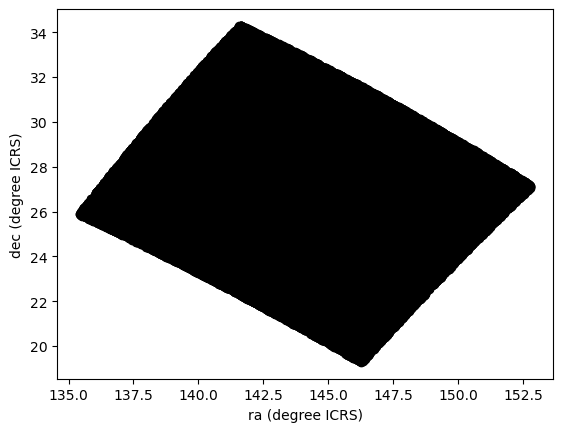

In [120]:
x = polygon_results['ra']
y = polygon_results['dec']
plt.plot(x, y, 'ko')

plt.xlabel('ra (degree ICRS)')
plt.ylabel('dec (degree ICRS)')

## Exercise

Text(0, 0.5, 'dec (degree ICRS)')

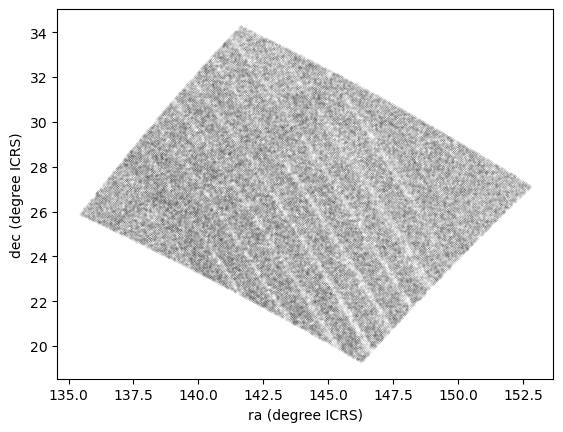

In [123]:
x = polygon_results['ra']
y = polygon_results['dec']
plt.plot(x, y, 'ko', markersize=0.1, alpha=0.3)

plt.xlabel('ra (degree ICRS)')
plt.ylabel('dec (degree ICRS)')

## Transform back

In [124]:
skycoord = SkyCoord(ra=polygon_results['ra'], dec=polygon_results['dec'])

In [125]:
distance = 8* u.kpc
radial_velocity = 0 *u.km/u.s

skycoord = SkyCoord(ra=polygon_results['ra'],
                    dec=polygon_results['dec'],
                    pm_ra_cosdec = polygon_results['pmra'],
                    pm_dec = polygon_results['pmdec'],
                    distance=distance,
                    radial_velocity=radial_velocity)

In [126]:
transformed = skycoord.transform_to(gd1_frame)

## Reflex Correction

In [127]:
from gala.coordinates import reflex_correct

In [128]:
skycoord_gd1 = reflex_correct(transformed)

Text(0, 0.5, 'phi2 (degree GD1)')

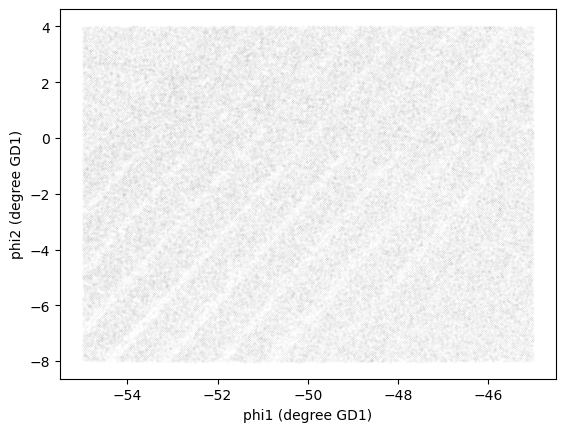

In [129]:
x = skycoord_gd1.phi1
y = skycoord_gd1.phi2
plt.plot(x, y, 'ko', markersize=0.1, alpha=0.1)
plt.xlabel('phi1 (degree GD1)')
plt.ylabel('phi2 (degree GD1)')

## Pandas DataFrame

In [130]:
type(polygon_results)

astropy.table.table.Table

In [131]:
type(skycoord_gd1)

astropy.coordinates.sky_coordinate.SkyCoord

In [132]:
polygon_results['phi1'] = skycoord_gd1.phi1
polygon_results['phi2'] = skycoord_gd1.phi2
polygon_results.info()

<Table length=140339>
   name    dtype    unit                              description                                class    
--------- ------- -------- ------------------------------------------------------------------ ------------
SOURCE_ID   int64          Unique source identifier (unique within a particular Data Release) MaskedColumn
       ra float64      deg                                                    Right ascension MaskedColumn
      dec float64      deg                                                        Declination MaskedColumn
     pmra float64 mas / yr                         Proper motion in right ascension direction MaskedColumn
    pmdec float64 mas / yr                             Proper motion in declination direction MaskedColumn
 parallax float64      mas                                                           Parallax MaskedColumn
     phi1 float64      deg                                                                          Column
     phi2 float

In [133]:
polygon_results['pm_phi1'] = skycoord_gd1.pm_phi1_cosphi2
polygon_results['pm_phi2'] = skycoord_gd1.pm_phi2
polygon_results.info()

<Table length=140339>
   name    dtype    unit                              description                                class    
--------- ------- -------- ------------------------------------------------------------------ ------------
SOURCE_ID   int64          Unique source identifier (unique within a particular Data Release) MaskedColumn
       ra float64      deg                                                    Right ascension MaskedColumn
      dec float64      deg                                                        Declination MaskedColumn
     pmra float64 mas / yr                         Proper motion in right ascension direction MaskedColumn
    pmdec float64 mas / yr                             Proper motion in declination direction MaskedColumn
 parallax float64      mas                                                           Parallax MaskedColumn
     phi1 float64      deg                                                                          Column
     phi2 float

In [134]:
import pandas as pd

In [135]:
results_df = polygon_results.to_pandas()

In [136]:
results_df.shape

(140339, 10)

In [137]:
results_df.head()

,SOURCE_ID,ra,dec,pmra,pmdec,parallax,phi1,phi2,pm_phi1,pm_phi2
0,637987125186749568,142.483019,21.757716,-2.516838,2.941813,-0.257345,-54.975623,-3.659349,6.429945,6.518157
1,638285195917112960,142.254529,22.476168,2.662702,-12.165984,0.422728,-54.498247,-3.081524,-3.168637,-6.206795
2,638073505568978688,142.645286,22.166932,18.306747,-7.950660,0.103640,-54.551634,-3.554229,9.129447,-16.819570
3,638086386175786752,142.577394,22.227920,0.987786,-2.584105,-0.857327,-54.536457,-3.467966,3.837120,0.526461
4,638049655615392384,142.589136,22.110783,0.244439,-4.941079,0.099625,-54.627448,-3.542738,1.466103,-0.185292


In [140]:
def make_dataframe(table):
    """Transform coordinates from ICRS to GD-1 frame.

    table: Astropy Table

    returns: Pandas DataFrame
    """
    #Create a SkyCoord object with the coordinates and proper motions in the input table
    skycoord = SkyCoord(
                        ra=table['ra'],
                        dec=table['dec'],
                        pm_ra_cosdec=table['pmra'],
                        pm_dec=table['pmdec'],
                        distance=8*u.kpc,
                        radial_velocity=0*u.km/u.s)
    #define the GD-1 reference frame
    gd1_frame = GD1Koposov10()

    #transfom input coordinates to the GD-1 reference frame
    transformed = skycoord.transform_to(gd1_frame)

    #Correct GD-1 coordinates for solar system motion around galactic center
    skycoord_gd1 = reflex_correct(transformed)

    #Add GD-1 reference frame columns for coordinates and proper motions
    table['phi1'] = skycoord_gd1.phi1
    table['phi2'] = skycoord_gd1.phi2
    table['pm_phi1'] = skycoord_gd1.pm_phi1_cosphi2
    table['pm_phi2'] = skycoord_gd1.pm_phi2

    #Create DataFrame
    df = table.to_pandas()

    return df

In [141]:
results_df = make_dataframe(polygon_results)

## Saving the DataFrame

In [142]:
from astropy.table import Table
results_table = Table.from_pandas(results_df)
type(results_table)

astropy.table.table.Table

In [146]:
filename = 'gd1_data.hdf'
results_df.to_hdf(path_or_buf=filename, key='results_df', mode='w')

# Plotting and Pandas

## Exploring data

Pandas has tools for data exploration. `describe` gives summary statistics on each column

In [147]:
results_df.describe()

,SOURCE_ID,ra,dec,pmra,pmdec,parallax,phi1,phi2,pm_phi1,pm_phi2
count,1.403390e+05,140339.000000,140339.000000,140339.000000,140339.000000,140339.000000,140339.000000,140339.000000,140339.000000,140339.000000
mean,6.792399e+17,143.823122,26.780285,-2.484404,-6.100777,0.179492,-50.091158,-1.803301,-0.868963,1.409208
std,3.792177e+16,3.697850,3.052592,5.913939,7.202047,0.759590,2.892344,3.444398,6.657714,6.518615
min,6.214900e+17,135.425699,19.286617,-106.755260,-138.065163,-15.287602,-54.999989,-8.029159,-115.275637,-161.150142
25%,6.443517e+17,140.967966,24.592490,-5.038789,-8.341561,-0.035981,-52.602952,-4.750426,-2.948723,-1.107128
50%,6.888060e+17,143.734409,26.746261,-1.834943,-4.689596,0.362708,-50.147362,-1.671502,0.585037,1.987149
75%,6.976579e+17,146.607350,28.990500,0.452893,-1.937809,0.657637,-47.593279,1.160514,3.001768,4.628965
max,7.974418e+17,152.777393,34.285481,104.319923,20.981070,0.999957,-44.999985,4.014609,39.802471,79.275199


## Exercise

Review the summary statistics in this table.
* do the values make sense based on what you know about the context?
* do you see any values that seem problematic, or evidence of other data issues?

25% of parallax are negative - from source confusion and errors in systematic errors in zeropoint. Fortunately we aren't going to use this column

## Plot proper motion

Expect proper motion of GD1 to be along stream - so v_phi1 non-zero and clustered around a value than and v_phi2 near 0

plot proper motion and see if we can ID GD1

Text(0, 0.5, 'Proper motion phi2 (mas/yr GD1 frame)')

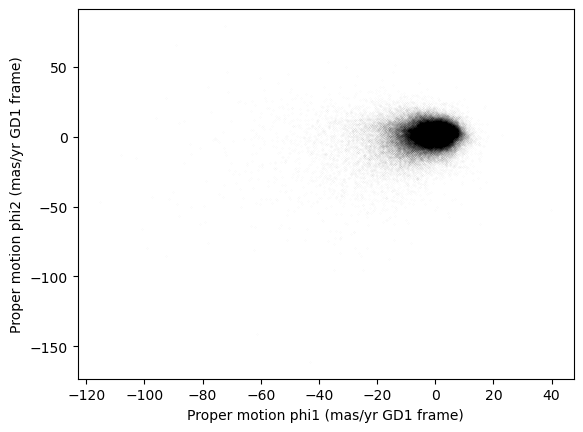

In [148]:
x = results_df['pm_phi1']
y = results_df['pm_phi2']
plt.plot(x, y, 'ko', markersize=0.1, alpha=0.1)

plt.xlabel('Proper motion phi1 (mas/yr GD1 frame)')
plt.ylabel('Proper motion phi2 (mas/yr GD1 frame)')

zoom in with xlim and ylim

(-10.0, 10.0)

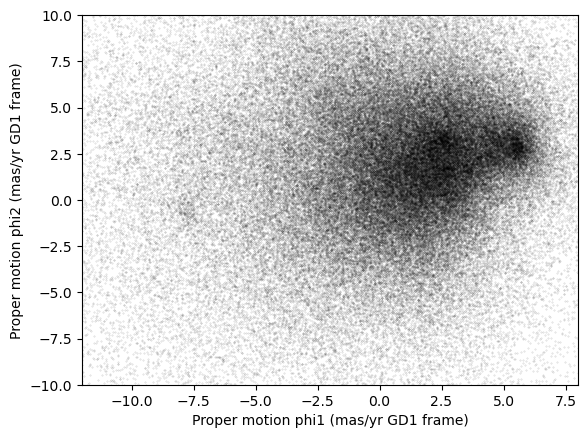

In [151]:
x = results_df['pm_phi1']
y = results_df['pm_phi2']
plt.plot(x, y, 'ko', markersize=0.3, alpha=0.2)

plt.xlabel('Proper motion phi1 (mas/yr GD1 frame)')
plt.ylabel('Proper motion phi2 (mas/yr GD1 frame)')

plt.xlim(-12, 8)
plt.ylim(-10, 10)

hint at overdense region at (-7.5, 0) but we need a more pure sample. Use only points around the phi2=0 - from figure zoom in on +/-1 degree

In [152]:
phi2 = results_df['phi2']
type(phi2)

pandas.core.series.Series

Series is a pandas column

In [153]:
phi2_min = -1 * u.degree
phi2_max = 1 * u.degree

mask = (phi2 > phi2_min)
type(mask)

pandas.core.series.Series

In [154]:
mask.head()

0    False
1    False
2    False
3    False
4    False
Name: phi2, dtype: bool

array of True and False

Use & operator to apply both a min and a max

In [155]:
mask = (phi2 > phi2_min) & (phi2 < phi2_max)

python's logical operators `and`, `or`, `not` don't work on Numpy arrays or Pandas. Both require bitwise operators (&, | , ~)

trick: how many values are true? Use .sum (in python True=1, False=0)

In [156]:
mask.sum()

np.int64(25084)

Let's use the mask to select just the stars around the center and create a new df

In [157]:
centerline_df = results_df[mask]
type(centerline_df)

pandas.core.frame.DataFrame

In [158]:
len(centerline_df)

25084

In [159]:
len(centerline_df)/len(results_df)

0.1787386257562046

Fraction of stars near the center line

## Plotting proper motion

This is the second time we're making this plot and we can imagine doing it again --> make a function  
reusable with different data frames and less typing

In [160]:
def plot_proper_motion(df):
    """Plot proper motion.

    df: DataFrame with pm_phi1 and pm_phi2
    """
    x = df['pm_phi1']
    y = df['pm_phi2']
    plt.plot(x, y, 'ko', markersize=0.3, alpha=0.3)

    plt.xlabel('Proper motion phi1 (mas/yr)')
    plt.ylabel('Proper motion phi2 (mas/yr)')

    plt.xlim(-12, 8)
    plt.ylim(-10, 10)

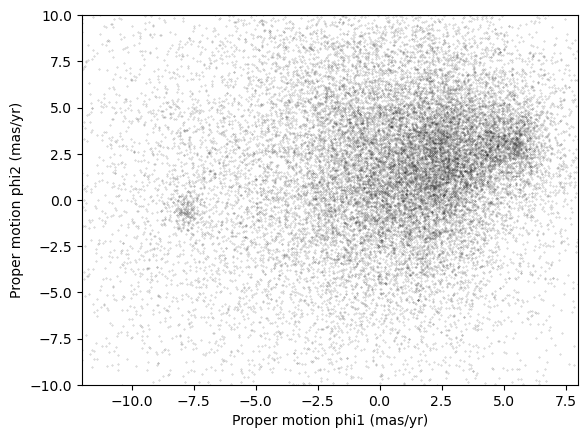

In [161]:
plot_proper_motion(centerline_df)

* we're still  using a smaller region than the paper
* overdensity stands out more - that must be GD1

## Filtering based on proper motion

we will select stars in this region with a rectangle - selected by eye

In [162]:
pm1_min = -8.9
pm1_max = -6.9
pm2_min=-2.2
pm2_max = 1.0

 use `make_rectangle` function we wrote to plot bounds on our figure

In [165]:
pm1_rect, pm2_rect = make_rectangle(pm1_min, pm1_max, pm2_min, pm2_max)

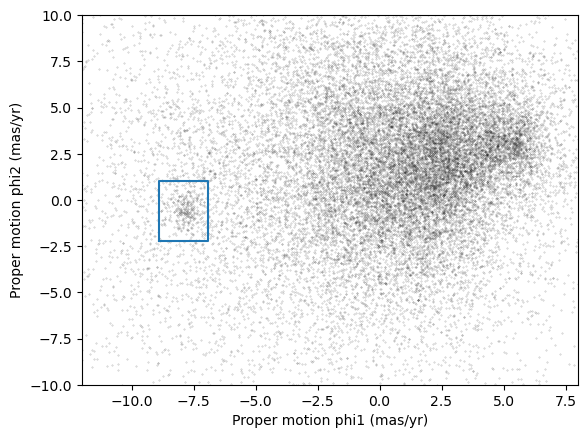

In [166]:
plot_proper_motion (centerline_df)
plt.plot(pm1_rect, pm2_rect, '-')

use these bounds to select stars from results_df

In [167]:
def between(series, low, high):
    """Check whether values are between `low` and `high`"""
    return (series > low) & (series< high)

In [168]:
pm1 = results_df['pm_phi1']
pm2 = results_df['pm_phi2']

pm_mask = (between(pm1, pm1_min, pm1_max) & 
           between(pm2, pm2_min, pm2_max))

check how many stars selected

In [169]:
pm_mask.sum()

np.int64(1049)

In [170]:
selected_df = results_df[pm_mask]
len(selected_df)

1049

This could be a pretty pure sample of GD 1 - let's plot it

Text(0, 0.5, 'phi2 (degree GD1)')

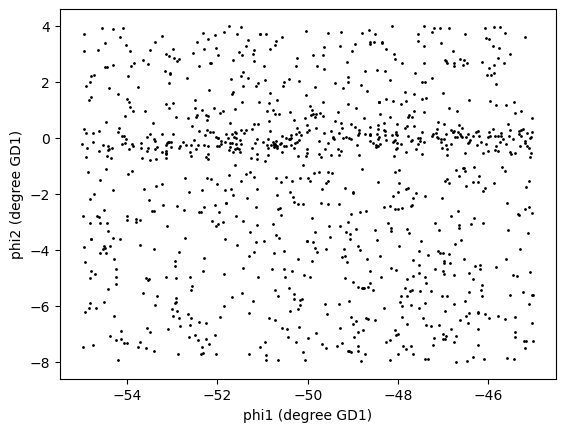

In [171]:
x = selected_df['phi1']
y = selected_df['phi2']
plt.plot(x, y, 'ko', markersize=1, alpha=1)

plt.xlabel('phi1 (degree GD1)')
plt.ylabel('phi2 (degree GD1)')

Clean up the plot
* axis = 'equal'
* title and title fontsize

(np.float64(-55.492803213090355),
 np.float64(-44.503699550734694),
 np.float64(-8.606246809552188),
 np.float64(4.601299340488259))

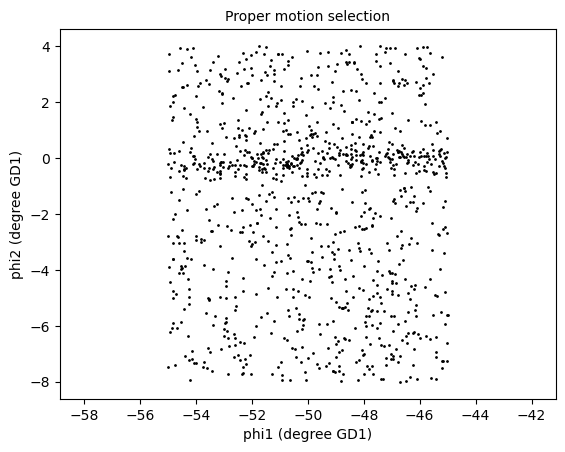

In [172]:
x = selected_df['phi1']
y = selected_df['phi2']
plt.plot(x, y, 'ko', markersize=1, alpha=1)

plt.xlabel('phi1 (degree GD1)')
plt.ylabel('phi2 (degree GD1)')
plt.title('Proper motion selection', fontsize='medium')

plt.axis('equal')

This is a panel of our figure - let's make a function to plot it

In [173]:
def plot_pm_selection(df):
    """Plot in GD-1 spatial coordinates the location of the stars selected by proper motion"""
    x = df['phi1']
    y = df['phi2']
    plt.plot(x, y, 'ko', markersize=1, alpha=1)
    
    plt.xlabel('phi1 (degree GD1)')
    plt.ylabel('phi2 (degree GD1)')
    plt.title('Proper motion selection', fontsize='medium')
    
    plt.axis('equal')
    

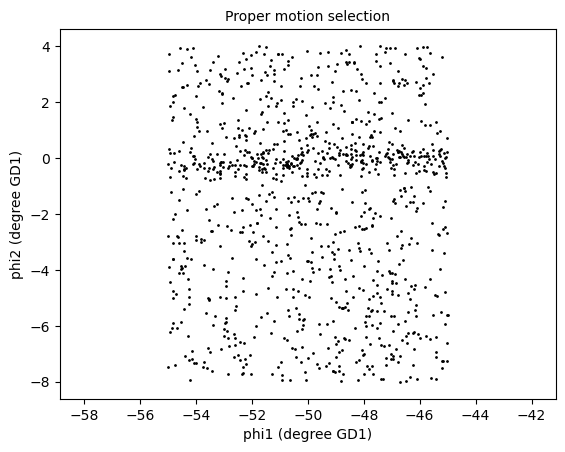

In [174]:
plot_pm_selection(selected_df)

## Saving the DataFrame

Successful query and clean results  
Save a check point  

HDF5 files allow more than one dataset and store metadata associated with each dataset  
omit mode='w' to add a dataset

In [176]:
filename = 'gd1_data.hdf'
selected_df.to_hdf(filename, key='selected_df')

## Exercise

We are going to need centerline_df later as well. Write a line of code to add it as a second dataset to the HDF5 file.

Hint: Since the file already exists, you should *not* use mode='w'

In [177]:
centerline_df.to_hdf(filename, key='centerline_df')

In [178]:
MB=1024*1024
getsize(filename)/MB

13.992622375488281

In [179]:
with pd.HDFStore(filename) as hdf:
    print(hdf.keys())

['/centerline_df', '/results_df', '/selected_df']


* with automatically closes the file
* use the df names as keys to more easily map between the code and the file

Key Point: we prototyped on a smaller dataset - now we can apply our strict filter to a larger dataset